In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import yfinance as yf
from pandas_datareader import data as pdr
from datetime import datetime, date, timedelta
from dateutil.relativedelta import relativedelta

In [2]:
yf.pdr_override()

In [3]:
end_date = (datetime.now() + timedelta(1)).strftime("%Y-%m-%d")

In [4]:
def first_business_day(date):
    month = date.replace(day=1)
    if month.weekday() > 4:
        month = date.replace(day=(8 - month.weekday()))
    return month.strftime("%Y-%m-%d")

In [5]:
start_date = first_business_day((date.today() + relativedelta(months=-3)))

In [6]:
# https://blog.toroinvestimentos.com.br/empresas-listadas-b3-bovespa
empresas_ibov = pd.read_csv('empresas.csv', sep=';')
empresas_ibov['Código Yahoo'] = empresas_ibov['Código'].apply(lambda x: x + '.SA')
indicator = 'BOVA11.SA'

In [7]:
empresas_ibov

,Empresa,Código,Setor,Peso no Ibovespa,Código Yahoo
0,AMBEV S/A,ABEV3,Consumo não-cíclico,"4,60%",ABEV3.SA
1,AZUL,AZUL4,Bens Industriais,"0,92%",AZUL4.SA
2,B2W DIGITAL,BTOW3,Comércio,"0,35%",BTOW3.SA
3,B3,B3SA3,Financeiro,"4,83%",B3SA3.SA
4,BB SEGURIDADE,BBSE3,Seguros,"1,29%",BBSE3.SA
...,...,...,...,...,...
61,ULTRAPAR,UGPA3,"Petróleo, Gás e Biocombustíveis","1,28%",UGPA3.SA
62,USIMINAS,USIM5,Siderurgia e Metalurgia,"0,28%",USIM5.SA
63,VALE,VALE3,Mineração,"9,71%",VALE3.SA
64,VIA VAREJO,VVAR3,Comércio,"0,21%",VVAR3.SA


In [8]:
data = pdr.get_data_yahoo(list(empresas_ibov['Código Yahoo']), start=start_date, end=end_date)

[*********************100%***********************]  66 of 66 completed

1 Failed download:
- PCAR4.SA: No data found for this date range, symbol may be delisted


In [9]:
def normalize_percent(x):
    if x == '-' or x == '-%':
        return 0
    return float(x.replace('%', '').replace(',', '.')) / 100

In [10]:
def solve(equation, var1, var2):
    try:
        return (equation.format(var1[0], var2[0]), eval(equation.format(var1[1], var2[1])))
    except:
        return (equation.format(var1[0], var2[0]), 0)

In [11]:
def calculate(equations, values):
    resolved = []
    for t1 in values:
        for t2 in values:
            for equation in equations:
                resolved.append(solve(equation, t1, t2))
    return resolved

In [12]:
df_indicators

NameError: name 'df_indicators' is not defined

In [60]:
list(zip(empresa['title'], empresa['value'].apply(lambda x: normalize_percent(x))))[0][1]

0.7574

In [10]:
equations = ['{}+{}', '{}-{}'] #, '{}*{}', '{}/{}', '{}**2 + {} ** 2']
df_indicators = pd.DataFrame()
for codigo in empresas_ibov['Código']:
    try:
        empresa = pd.read_json('crawlers/{}.json'.format(codigo))
        series = pd.Series(dict(zip(empresa['title'], empresa['value'].apply(lambda x: normalize_percent(x)))), name=codigo)
#         print(series)
        start_value = data['Close'][codigo + '.SA'][0]
        end_value = data['Close'][codigo + '.SA'][-1]
        series['value_diff'] = (end_value - start_value) / start_value
        
#         values_list = list(zip(empresa['title'], empresa['value'].apply(lambda x: normalize_percent(x))))
#         for t1 in values_list:
#             values = calculate(equations, values_list)
#             for t2 in values:
#                 for equation in equations:
#                     result = solve(equation, t1, t2)
# #                     print(result)
#                     series[result[0]] = result[1]
        
        df_indicators = df_indicators.append(series)
        print(codigo)
    except:
        print('Error loading {}'.format(codigo))

ABEV3
AZUL4
BTOW3
B3SA3
BBSE3
BRML3
BBDC4
BBDC3
Error loading BRAP4
BBAS3
Error loading BRKM5
BRFS3
CCRO3
Error loading CMIG4
CIEL3
CSAN3
CVCB3
CYRE3
ECOR3
ELET3
Error loading ELET6
EMBR3
ENBR3
EGIE3
EQTL3
YDUQ3
FLRY3
Error loading GGBR4
Error loading GOAU4
Error loading GOLL4
HYPE3
IGTA3
IRBR3
Error loading ITSA4
Error loading ITUB4
JBSS3
Error loading KLBN11
COGN3
RENT3
Error loading LAME4
LREN3
MGLU3
MRFG3
MRVE3
MULT3
NTCO3
Error loading PCAR4
Error loading PETR4
PETR3
BRDT3
QUAL3
RADL3
RAIL3
SBSP3
Error loading SANB11
CSNA3
SMLS3
SUZB3
Error loading TAEE11
Error loading VIVT4
TIMP3
UGPA3
Error loading USIM5
VALE3
VVAR3
WEGE3


In [11]:
df_indicators.sample()

,CAGR Lucros 5 anos,CAGR Receitas 5 anos,Dív. líquida/EBIT,Dív. líquida/EBITDA,Dív. líquida/PL,EV/EBIT,EV/EBITDA,Giro ativos,LPA,Liq. corrente,...,P/L,P/SR,P/VP,PL/Ativos,Passivo/Ativos,ROA,ROE,ROIC,VPA,value_diff
HYPE3,0.2365,0.0354,-0.0034,-0.0031,-0.0004,0.1847,0.1716,0.0024,0.018,0.0393,...,0.1812,0.0543,0.0228,0.0058,0.0042,0.0729,0.126,0.0751,0.1432,-0.068955


In [46]:
def solve(equation, var1, var2):
    try:
        return (equation.format(var1[0], var2[0]), eval(equation.format(var1[1], var2[1])))
    except:
        return 0
    
def calculate(equations, values):
    resolved = []
    for t1 in values:
        for t2 in values:
            for equation in equations:
                resolved.append(solve(equation, t1, t2))
    return resolved
testes = [('t1', 1), ('t2', 2), ('t3', 3)]
equations = ['{}+{}', '{}-{}', '{}*{}', '{}/{}', '{}**2 + {} ** 2']
solved = testes
results = []
for t1 in testes:
    values = calculate(equations, testes)
    for t2 in values:
        for equation in equations:
            results.append(solve(equation, t1, t2))
for i in results:
    print(str(i))
print(len(results))

('t1+t1+t1', 3)
('t1-t1+t1', -1)
('t1*t1+t1', 2)
('t1/t1+t1', 0.5)
('t1**2 + t1+t1 ** 2', 5)
('t1+t1-t1', 1)
('t1-t1-t1', 1)
('t1*t1-t1', 0)
0
('t1**2 + t1-t1 ** 2', 1)
('t1+t1*t1', 2)
('t1-t1*t1', 0)
('t1*t1*t1', 1)
('t1/t1*t1', 1.0)
('t1**2 + t1*t1 ** 2', 2)
('t1+t1/t1', 2.0)
('t1-t1/t1', 0.0)
('t1*t1/t1', 1.0)
('t1/t1/t1', 1.0)
('t1**2 + t1/t1 ** 2', 2.0)
('t1+t1**2 + t1 ** 2', 3)
('t1-t1**2 + t1 ** 2', -1)
('t1*t1**2 + t1 ** 2', 2)
('t1/t1**2 + t1 ** 2', 0.5)
('t1**2 + t1**2 + t1 ** 2 ** 2', 5)
('t1+t1+t2', 4)
('t1-t1+t2', -2)
('t1*t1+t2', 3)
('t1/t1+t2', 0.3333333333333333)
('t1**2 + t1+t2 ** 2', 10)
('t1+t1-t2', 0)
('t1-t1-t2', 2)
('t1*t1-t2', -1)
('t1/t1-t2', -1.0)
('t1**2 + t1-t2 ** 2', 0)
('t1+t1*t2', 3)
('t1-t1*t2', -1)
('t1*t1*t2', 2)
('t1/t1*t2', 0.5)
('t1**2 + t1*t2 ** 2', 5)
('t1+t1/t2', 1.5)
('t1-t1/t2', 0.5)
('t1*t1/t2', 0.5)
('t1/t1/t2', 2.0)
('t1**2 + t1/t2 ** 2', 1.25)
('t1+t1**2 + t2 ** 2', 6)
('t1-t1**2 + t2 ** 2', -4)
('t1*t1**2 + t2 ** 2', 5)
('t1/t1**2 + t2 ** 2

In [26]:
4-3

1

Text(0,0.5,'value_diff')

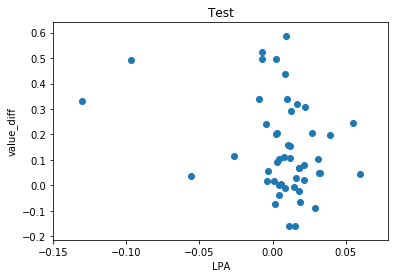

In [12]:
plt.scatter(df_indicators['LPA'], df_indicators['value_diff'])
plt.title('Test')
plt.xlabel('LPA')
plt.ylabel('value_diff')

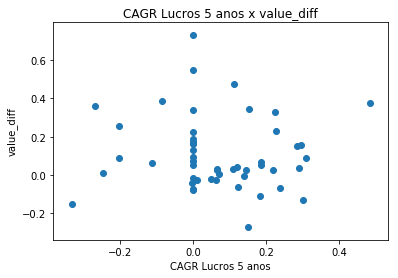

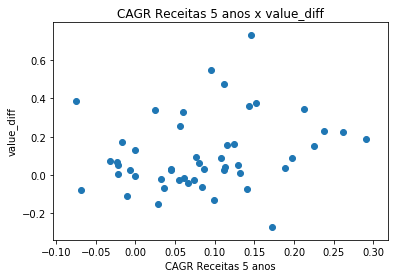

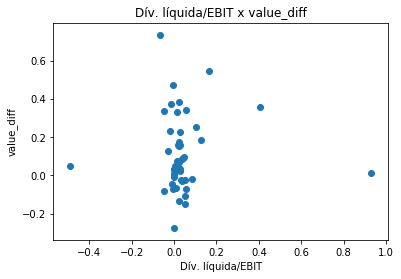

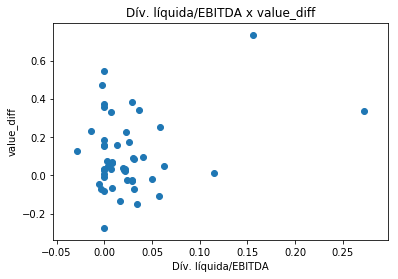

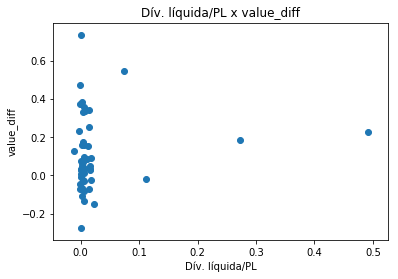

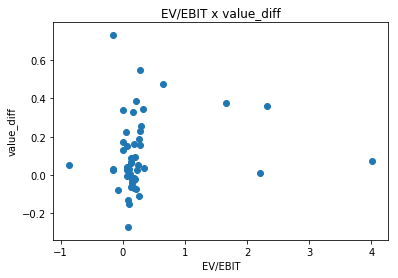

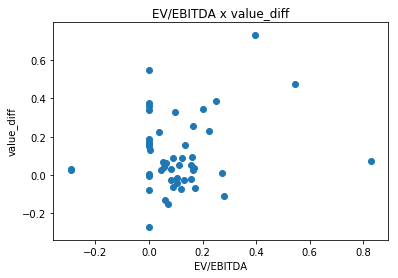

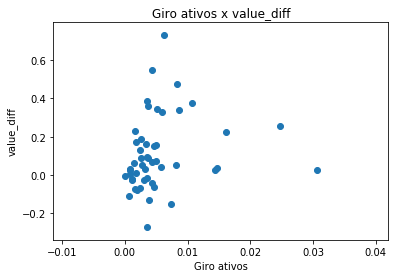

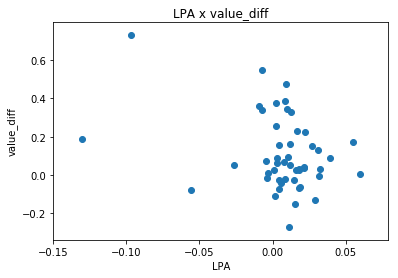

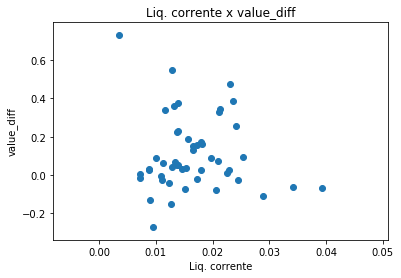

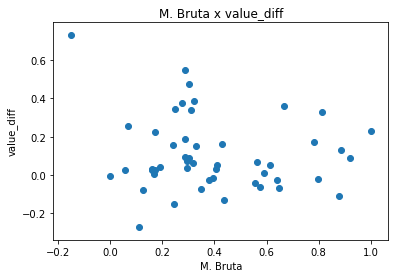

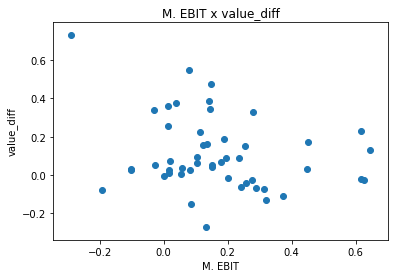

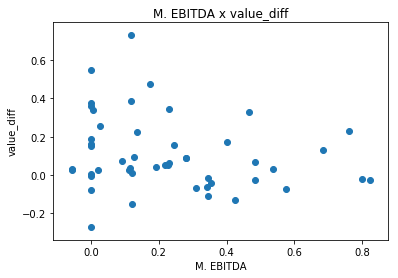

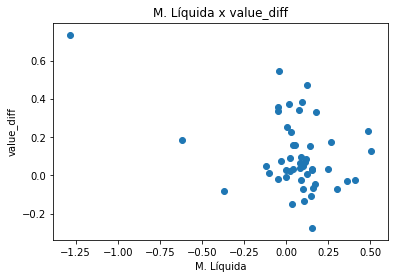

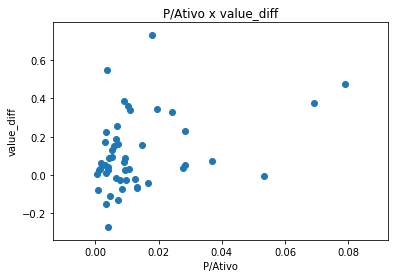

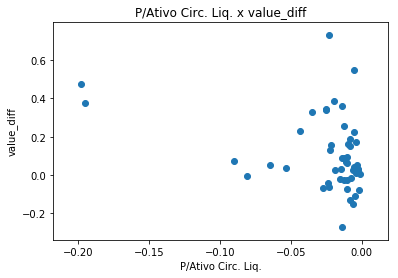

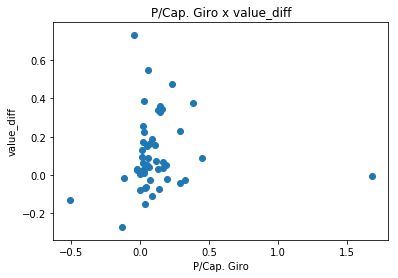

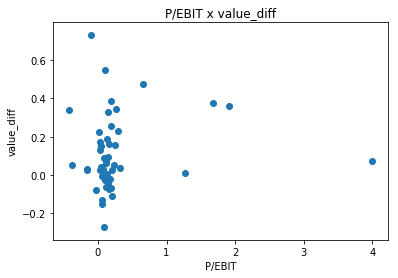

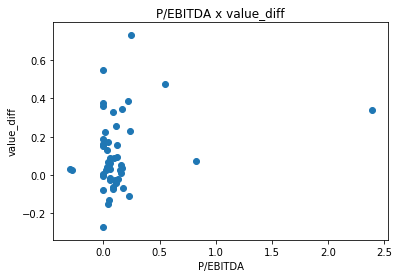

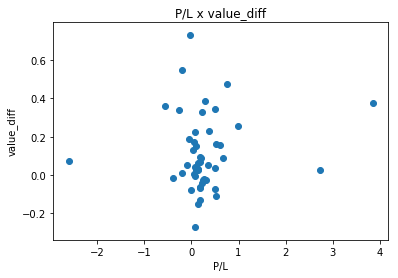

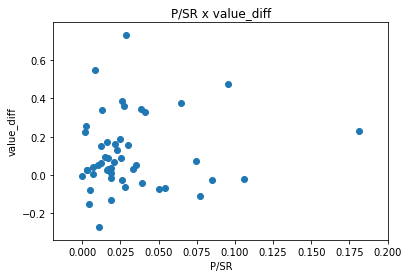

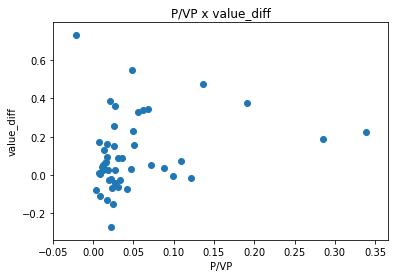

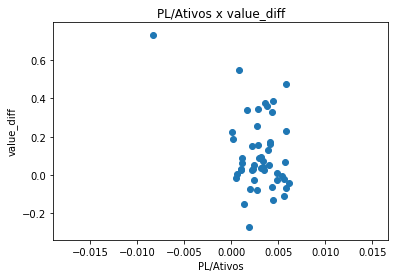

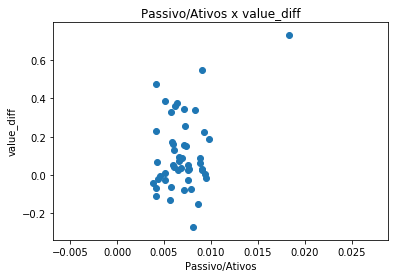

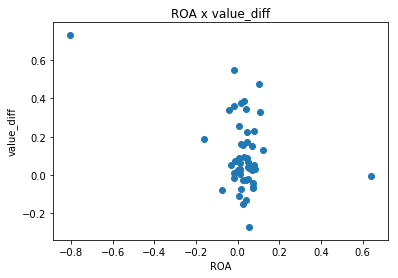

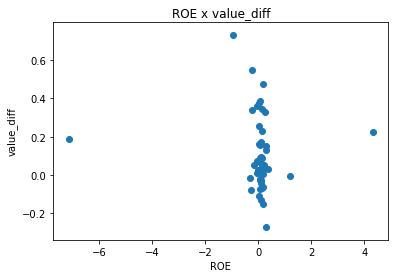

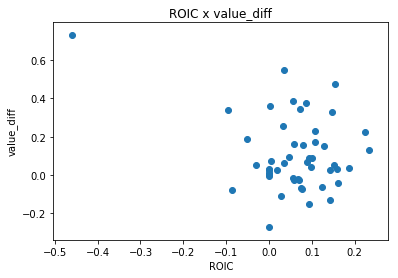

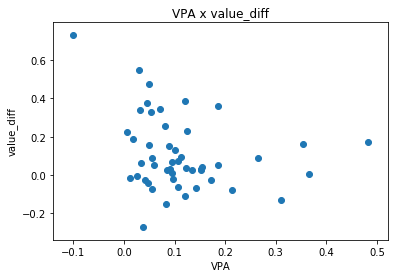

In [12]:
keys = list(df_indicators.iloc[0].keys())
keys.remove('value_diff')
for key in keys:
    plt.scatter(df_indicators[key], df_indicators['value_diff'])
    plt.title('{} x {}'.format(key, 'value_diff'))
    plt.xlabel(key)
    plt.ylabel('value_diff')
    plt.show()

In [80]:
for company in df_indicators:
    
df_indicators.iloc[0]

CAGR Lucros 5 anos     -0.002800
CAGR Receitas 5 anos    0.066700
Dív. líquida/EBIT      -0.008000
Dív. líquida/EBITDA    -0.005800
Dív. líquida/PL        -0.001400
EV/EBIT                 0.144500
EV/EBITDA               0.105200
Giro ativos             0.004300
LPA                     0.005700
Liq. corrente           0.012400
M. Bruta                0.556900
M. EBIT                 0.257200
M. EBITDA               0.353200
M. Líquida              0.171400
P/Ativo                 0.016800
P/Ativo Circ. Liq.     -0.024000
P/Cap. Giro             0.290300
P/EBIT                  0.152500
P/EBITDA                0.111100
P/L                     0.228900
P/SR                    0.039200
P/VP                    0.027600
PL/Ativos               0.006100
Passivo/Ativos          0.003800
ROA                     0.073400
ROE                     0.120600
ROIC                    0.161000
VPA                     0.047000
value_diff              0.046769
Name: ABEV3, dtype: float64